# Sparse linear equations

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demlin03.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Ago-07</i>
<hr>

In [1]:
import numpy as np
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix


Define some timing functions

In [2]:
tic = lambda: timer()
toc = lambda t: timer() - t

Compute the time to solve a system of equations, for full and sparce matrices

In [3]:
N, M = 800, 100

AA = np.random.rand(N, N)
bb = np.random.rand(N, 1)
for i in range(N):
    for j in range(N):
        if abs(i - j) > 1:
            AA[i,j] = 0

nvalues = np.arange(20,N+1,30)
ratio = np.zeros_like(nvalues, dtype=float)

for k, n in enumerate(nvalues):
    A = AA[:n, :n]
    b = bb[:n]
    tt = tic()
    for i in range(M):
        x = solve(A, b)

    toc1 = toc(tt)

    S = csc_matrix(A)
    tt = tic()
    for i in range(M):
        x = spsolve(S, b)

    toc2 = toc(tt)
    ratio[k] = toc2 / toc1

Plot effort ratio

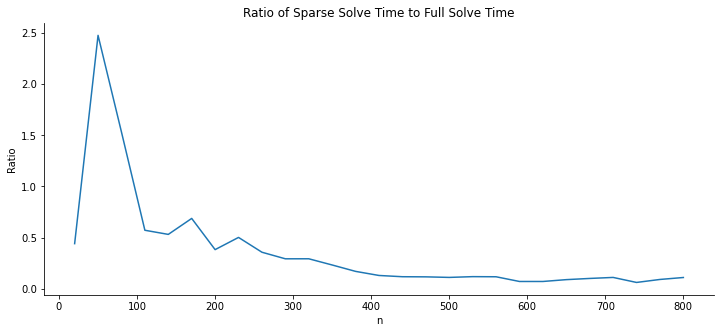

In [4]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.plot(nvalues, ratio)
ax.set(xlabel='n',
       ylabel='Ratio', 
       title='Ratio of Sparse Solve Time to Full Solve Time')

ax.spines[['top', 'right']].set_visible(False)